In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load the clustered dataset from the previous step
df = pd.read_csv('../data/processed/mental_health_clustered.csv')

# Preview the dataset
df.head()

,are_you_selfemployed,how_many_employees_does_your_company_or_organization_have,is_your_employer_primarily_a_tech_companyorganization,is_your_primary_role_within_your_company_related_to_techit,does_your_employer_provide_mental_health_benefits_as_part_of_healthcare_coverage,do_you_know_the_options_for_mental_health_care_available_under_your_employerprovided_coverage,has_your_employer_ever_formally_discussed_mental_health_for_example_as_part_of_a_wellness_campaign_or_other_official_communication,does_your_employer_offer_resources_to_learn_more_about_mental_health_concerns_and_options_for_seeking_help,is_your_anonymity_protected_if_you_choose_to_take_advantage_of_mental_health_or_substance_abuse_treatment_resources_provided_by_your_employer,if_a_mental_health_issue_prompted_you_to_request_a_medical_leave_from_work_asking_for_that_leave_would_be,do_you_think_that_discussing_a_mental_health_disorder_with_your_employer_would_have_negative_consequences,do_you_think_that_discussing_a_physical_health_issue_with_your_employer_would_have_negative_consequences,would_you_feel_comfortable_discussing_a_mental_health_disorder_with_your_coworkers,would_you_feel_comfortable_discussing_a_mental_health_disorder_with_your_direct_supervisors,do_you_feel_that_your_employer_takes_mental_health_as_seriously_as_physical_health,have_you_heard_of_or_observed_negative_consequences_for_coworkers_who_have_been_open_about_mental_health_issues_in_your_workplace,do_you_have_medical_coverage_private_insurance_or_stateprovided_which_includes_treatment_of_mental_health_issues,do_you_know_local_or_online_resources_to_seek_help_for_a_mental_health_disorder,if_you_have_been_diagnosed_or_treated_for_a_mental_health_disorder_do_you_ever_reveal_this_to_clients_or_business_contacts,if_you_have_revealed_a_mental_health_issue_to_a_client_or_business_contact_do_you_believe_this_has_impacted_you_negatively,if_you_have_been_diagnosed_or_treated_for_a_mental_health_disorder_do_you_ever_reveal_this_to_coworkers_or_employees,if_you_have_revealed_a_mental_health_issue_to_a_coworker_or_employee_do_you_believe_this_has_impacted_you_negatively,do_you_believe_your_productivity_is_ever_affected_by_a_mental_health_issue,if_yes_what_percentage_of_your_work_time_time_performing_primary_or_secondary_job_functions_is_affected_by_a_mental_health_issue,do_you_have_previous_employers,have_your_previous_employers_provided_mental_health_benefits,were_you_aware_of_the_options_for_mental_health_care_provided_by_your_previous_employers,did_your_previous_employers_ever_formally_discuss_mental_health_as_part_of_a_wellness_campaign_or_other_official_communication,did_your_previous_employers_provide_resources_to_learn_more_about_mental_health_issues_and_how_to_seek_help,was_your_anonymity_protected_if_you_chose_to_take_advantage_of_mental_health_or_substance_abuse_treatment_resources_with_previous_employers,do_you_think_that_discussing_a_mental_health_disorder_with_previous_employers_would_have_negative_consequences,do_you_think_that_discussing_a_physical_health_issue_with_previous_employers_would_have_negative_consequences,would_you_have_been_willing_to_discuss_a_mental_health_issue_with_your_previous_coworkers,would_you_have_been_willing_to_discuss_a_mental_health_issue_with_your_direct_supervisors,did_you_feel_that_your_previous_employers_took_mental_health_as_seriously_as_physical_health,did_you_hear_of_or_observe_negative_consequences_for_coworkers_with_mental_health_issues_in_your_previous_workplaces,would_you_be_willing_to_bring_up_a_physical_health_issue_with_a_potential_employer_in_an_interview,why_or_why_not,would_you_bring_up_a_mental_health_issue_with_a_potential_employer_in_an_interview,why_or_why_not1,do_you_feel_that_being_identified_as_a_person_with_a_mental_health_issue_would_hurt_your_career,do_you_think_that_team_memberscoworkers_would_view_you_more_negatively_if_they_knew_you_suffered_from_a_mental_health_issue,how_willing_would_you_be_to_share_with_friends_and_family_that_you_hav

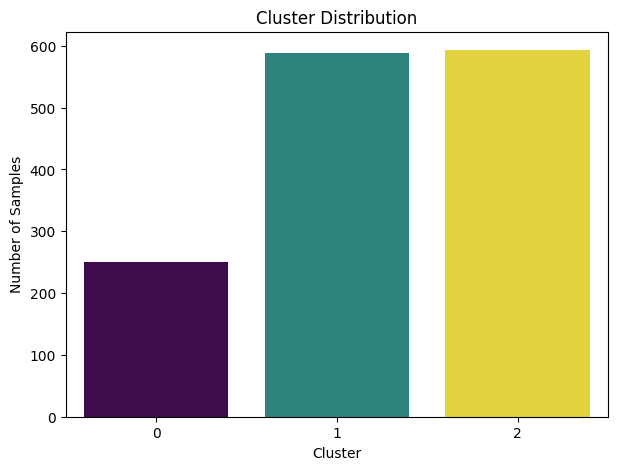

Cluster distribution:
 cluster
0    251
1    589
2    593
Name: count, dtype: int64


In [9]:
# Check how many samples fall into each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

print("Cluster distribution:\n", cluster_counts)

In [10]:
#Calculate mean values for each feature per cluster
cluster_profile = df.groupby('cluster').mean(numeric_only=True)

# Display the profile
print("Cluster profile (mean values):")
cluster_profile.head()

Cluster profile (mean values):


,are_you_selfemployed,is_your_employer_primarily_a_tech_companyorganization,is_your_primary_role_within_your_company_related_to_techit,do_you_think_that_discussing_a_mental_health_disorder_with_your_employer_would_have_negative_consequences,do_you_think_that_discussing_a_physical_health_issue_with_your_employer_would_have_negative_consequences,would_you_feel_comfortable_discussing_a_mental_health_disorder_with_your_coworkers,would_you_feel_comfortable_discussing_a_mental_health_disorder_with_your_direct_supervisors,have_you_heard_of_or_observed_negative_consequences_for_coworkers_who_have_been_open_about_mental_health_issues_in_your_workplace,do_you_have_medical_coverage_private_insurance_or_stateprovided_which_includes_treatment_of_mental_health_issues,do_you_have_previous_employers,would_you_be_willing_to_bring_up_a_physical_health_issue_with_a_potential_employer_in_an_interview,would_you_bring_up_a_mental_health_issue_with_a_potential_employer_in_an_interview,have_your_observations_of_how_another_individual_who_discussed_a_mental_health_disorder_made_you_less_likely_to_reveal_a_mental_health_issue_yourself_in_your_current_workplace,have_you_had_a_mental_health_disorder_in_the_past,do_you_currently_have_a_mental_health_disorder,have_you_been_diagnosed_with_a_mental_health_condition_by_a_medical_professional,have_you_ever_sought_treatment_for_a_mental_health_issue_from_a_mental_health_professional,what_is_your_age,gender_female,gender_male,gender_not specified,gender_other,country_Australia,country_Canada,country_France,country_Germany,country_Ireland,country_Netherlands,country_Other,country_Sweden,country_Switzerland,country_United Kingdom,country_United States,PCA1,PCA2
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.011952,0.713710,0.901408,0.982249,0.270270,0.040609,0.039409,0.233871,0.333333,0.852590,0.152866,0.008811,0.768000,0.914692,0.818681,0.741036,0.844622,33.569721,0.282869,0.665339,0.003984,0.047809,0.031873,0.043825,0.011952,0.027888,0.019920,0.015936,0.091633,0.003984,0.003984,0.091633,0.657371,1.841790,-1.713233
1,0.190153,0.777778,0.943396,0.164122,0.000000,0.429658,0.626230,0.041929,0.616071,0.848896,0.515152,0.170799,0.387324,0.060674,0.031320,0.011885,0.115450,33.399317,0.149406,0.830221,0.000000,0.020374,0.020374,0.074703,0.016978,0.061121,0.008489,0.032258,0.130730,0.018676,0.006791,0.151104,0.478778,-1.860330,-0.441346
2,0.290051,0.795724,0.976744,0.052632,0.002793,0.743961,0.894531,0.047506,0.668605,0.927487,0.527157,0.118519,0.446009,0.971751,0.863732,0.881956,0.942664,35.094595,0.288364,0.659359,0.003373,0.048904,0.025295,0.038786,0.005059,0.025295,0.008432,0.042159,0.057336,0.011804,0.008432,0.114671,0.662732,1.068204,1.163531


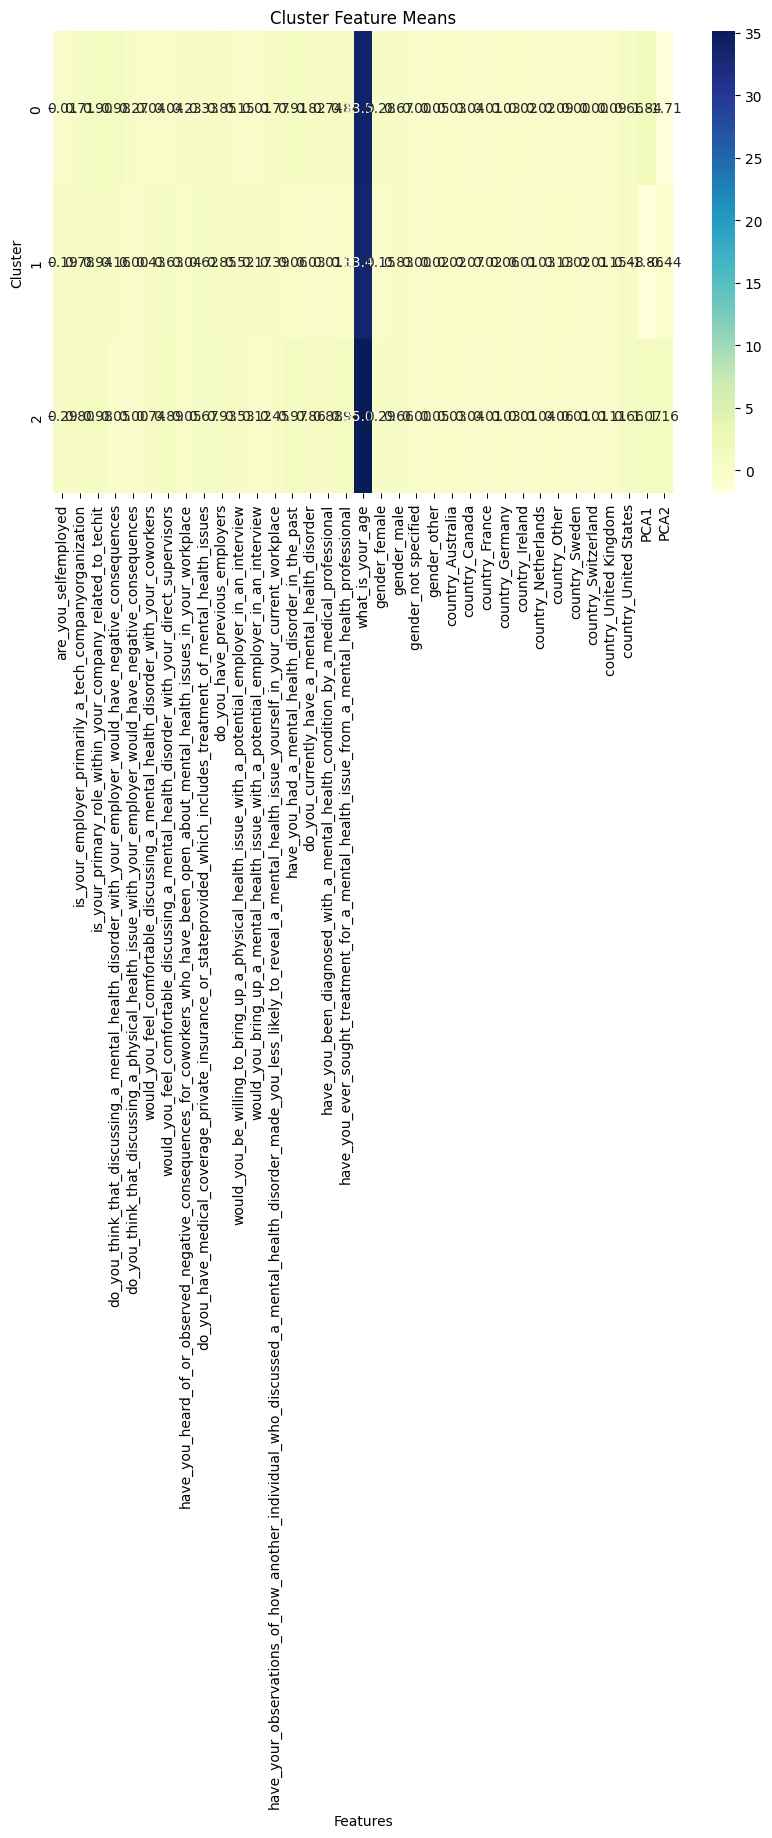

In [11]:
# Visualize average feature values by cluster using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Cluster Feature Means')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

In [12]:
# Visualize how specific features differ between clusters
selected_features = ['Age', 'self_employed', 'family_history', 'treatment']  # change based on your dataset

for feature in selected_features:
    if feature in df.columns:
        plt.figure(figsize=(7,5))
        sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')
        plt.title(f'{feature} Distribution Across Clusters')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

In [13]:
#Visualize clusters again in PCA space if PCA columns exist
if 'PC1' in df.columns and 'PC2' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue='cluster',
        palette='viridis',
        data=df,
        s=60, alpha=0.8
    )
    plt.title('Clusters in PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()
else:
    print("PCA columns not found. Please merge with PCA data if needed.")

PCA columns not found. Please merge with PCA data if needed.


In [14]:
# Save final cluster analysis results
output_path = '../data/processed/mental_health_cluster_analysis.csv'
df.to_csv(output_path, index=False)

print(f"Final cluster analysis file saved to: {output_path}")

Final cluster analysis file saved to: ../data/processed/mental_health_cluster_analysis.csv
